In [1]:
# Dependencies
import requests
import json
from xml.etree import ElementTree as ET
import pandas as pd
import numpy as np
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress
import plotly.graph_objects as go
from scipy import stats

In [2]:
# Read from csv files
life_expectancy = Path("../output/csv/master_dataset.csv")
life_expectancy_df = pd.read_csv(life_expectancy, low_memory=False)
# Display data
display(life_expectancy_df)

,Country,Year,Life Expectancy,Population,Type,"Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),countrycode,...,Alcohol use disorders,Cardiovascular diseases,Diabetes mellitus,Liver cancer due to alcohol use,Motor vehicle road injuries,Opioid use disorders,Police conflict and executions,Road injuries,Self-harm,"Tracheal, bronchus, and lung cancer"
0,Afghanistan,1950.0,27.7,7480,Country/Area,3962.0,3518.0,27.1,28.4,AFG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1951.0,28.0,7572,Country/Area,4002.0,3570.0,27.4,28.6,AFG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1952.0,28.4,7668,Country/Area,4043.0,3624.0,27.8,29.1,AFG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1953.0,28.9,7765,Country/Area,4086.0,3679.0,28.3,29.6,AFG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1954.0,29.2,7864,Country/Area,4129.0,3735.0,28.6,29.9,AFG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17059,Zimbabwe,2017.0,60.7,14751,Country/Area,6941.0,7810.0,58.2,63.0,ZWE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17060,Zimbabwe,2018.0,61.4,15052,Country/Area,7086.0,7966.0,59.0,63.6,ZWE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17061,Zimbabwe,2019.0,61.3,15355,Country/Area,7232.0,8123.0,58.6,63.7,ZWE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17062,Zimbabwe,2020.0,61.1,15670,Country/Area,7385.0,8284.0,58.1,63.9,ZWE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Display columns to help in choosing variables of interest
columns_df = pd.DataFrame(life_expectancy_df.columns)
display(columns_df)

,0
0,Country
1,Year
2,Life Expectancy
3,Population
4,Type
5,"Male Population, as of 1 July (thousands)"
6,"Female Population, as of 1 July (thousands)"
7,Male Life Expectancy at Birth (years)
8,Female Life Expectancy at Birth (years)
9,countrycode


In [4]:
# Remove the rows with missing values in GDP Per Capita
cleaned_df = life_expectancy_df.dropna(subset=['Health Expenditure'])
cleaned_df

,Country,Year,Life Expectancy,Population,Type,"Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),countrycode,...,Alcohol use disorders,Cardiovascular diseases,Diabetes mellitus,Liver cancer due to alcohol use,Motor vehicle road injuries,Opioid use disorders,Police conflict and executions,Road injuries,Self-harm,"Tracheal, bronchus, and lung cancer"
626,Argentina,2000.0,73.9,37071,Country/Area,18281.0,18790.0,70.6,77.2,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,Argentina,2001.0,74.2,37480,Country/Area,18484.0,18996.0,70.7,77.6,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,Argentina,2002.0,74.4,37885,Country/Area,18684.0,19201.0,70.8,78.1,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,Argentina,2003.0,74.1,38278,Country/Area,18880.0,19398.0,70.8,77.3,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,Argentina,2004.0,74.9,38669,Country/Area,19077.0,19592.0,71.5,78.1,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16339,United States,2017.0,78.8,329791,Country/Area,163282.0,166509.0,76.3,81.4,USA,...,16447.213615,870014.594907,68023.019190,6521.645578,29072.563739,45323.057374,1182.453872,43311.226390,51264.771154,172205.186019
16340,United States,2018.0,79.0,332140,Country/Area,164538.0,167602.0,76.5,81.5,USA,...,16881.662205,874704.259786,69243.158362,6842.077243,28301.510359,47371.011599,1166.479287,42451.281976,51762.833329,168804.579530
16341,United States,2019.0,79.1,334320,Country/Area,165699.0,168621.0,76.6,81.7,USA,...,17468.451200,880826.245325,71201.256403,7109.802427,27881.005935,50031.617474,1174.843121,41975.079605,51357.018236,167925.872553
16342,United States,2020.0,77.4,335942,Country/Area,166504.0,169438.0,74.6,80.3,USA,...,17342.695548,887324.919965,72130.507793,7371.063919,27682.805304,52561.060543,1118.220151,41612.775573,50982.047075,170317.701686


In [5]:
# Only copy colums which are needed for the analysis
final_df = cleaned_df[['Country', 'Year', 'Life Expectancy', 'Population', 'GDP per Capita', 'Health Expenditure']].copy()

# Reset index
final_df.reset_index(drop=True, inplace=True)

final_df

,Country,Year,Life Expectancy,Population,GDP per Capita,Health Expenditure
0,Argentina,2000.0,73.9,37071,14369.0,8.220
1,Argentina,2001.0,74.2,37480,13652.0,8.372
2,Argentina,2002.0,74.4,37885,12095.0,7.393
3,Argentina,2003.0,74.1,38278,13089.0,6.895
4,Argentina,2004.0,74.9,38669,14183.0,7.229
...,...,...,...,...,...,...
1775,United States,2017.0,78.8,329791,54152.0,16.638
1776,United States,2018.0,79.0,332140,55455.0,16.516
1777,United States,2019.0,79.1,334320,56469.0,16.553
1778,United States,2020.0,77.4,335942,54379.0,18.582


In [6]:
final_df.dtypes

Country                object
Year                  float64
Life Expectancy       float64
Population              int64
GDP per Capita        float64
Health Expenditure    float64
dtype: object

In [7]:
# Modify Datatype as needed
final_df['Year'] = final_df['Year'].astype("int")
final_df

,Country,Year,Life Expectancy,Population,GDP per Capita,Health Expenditure
0,Argentina,2000,73.9,37071,14369.0,8.220
1,Argentina,2001,74.2,37480,13652.0,8.372
2,Argentina,2002,74.4,37885,12095.0,7.393
3,Argentina,2003,74.1,38278,13089.0,6.895
4,Argentina,2004,74.9,38669,14183.0,7.229
...,...,...,...,...,...,...
1775,United States,2017,78.8,329791,54152.0,16.638
1776,United States,2018,79.0,332140,55455.0,16.516
1777,United States,2019,79.1,334320,56469.0,16.553
1778,United States,2020,77.4,335942,54379.0,18.582


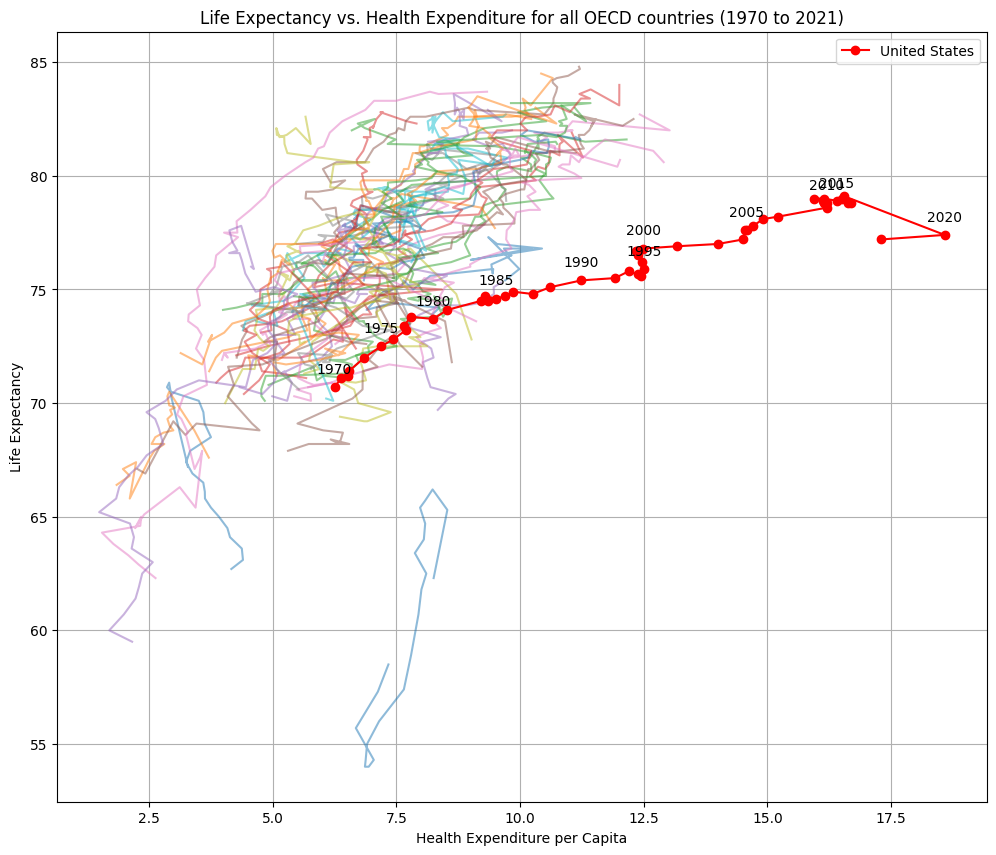

In [8]:
# Initialize the plot
plt.figure(figsize=(12, 10))

# List of countries to highlight (you can modify this as needed)
highlight_countries = ['United States']

# Plot data for each country
for country in final_df['Country'].unique():
    country_data = final_df[final_df['Country'] == country]
    if country in highlight_countries:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='red', marker='o')
        for i, row in country_data.iterrows():
            # Annotate every 5 years
            if int(row['Year']) % 5 == 0:  # Check if the year is a multiple of 5
                plt.annotate(row['Year'], (row['Health Expenditure'], row['Life Expectancy']), textcoords="offset points", xytext=(0,10), ha='center')
    else:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], alpha=0.5) #color='gray', )
    
# Set labels and title
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Life Expectancy')
plt.grid()
plt.title('Life Expectancy vs. Health Expenditure for all OECD countries (1970 to 2021)')
plt.legend()

# Save the figure 
plt.savefig("../output/graphs/Fig6.png")

# Show the plot
plt.show()

In [9]:
# Calculate mean GDP per Capita for each country
mean_gdp_per_capita = final_df.groupby('Country')['GDP per Capita'].mean()

## Find top 10 and bottom 10 countries by mean GDP per Capita
top_10_countries = mean_gdp_per_capita.nlargest(15).index.tolist()
bottom_10_countries = mean_gdp_per_capita.nsmallest(15).index.tolist()

print(top_10_countries)
print(bottom_10_countries)

['Norway', 'Luxembourg', 'Switzerland', 'United States', 'Denmark', 'Australia', 'Netherlands', 'Canada', 'France', 'Sweden', 'Italy', 'Germany', 'Ireland', 'Austria', 'Iceland']
['India', 'Indonesia', 'Ukraine', 'Peru', 'South Africa', 'Colombia', 'Costa Rica', 'Turkey', 'Brazil', 'Mexico', 'Bulgaria', 'Argentina', 'Poland', 'Hungary', 'Romania']


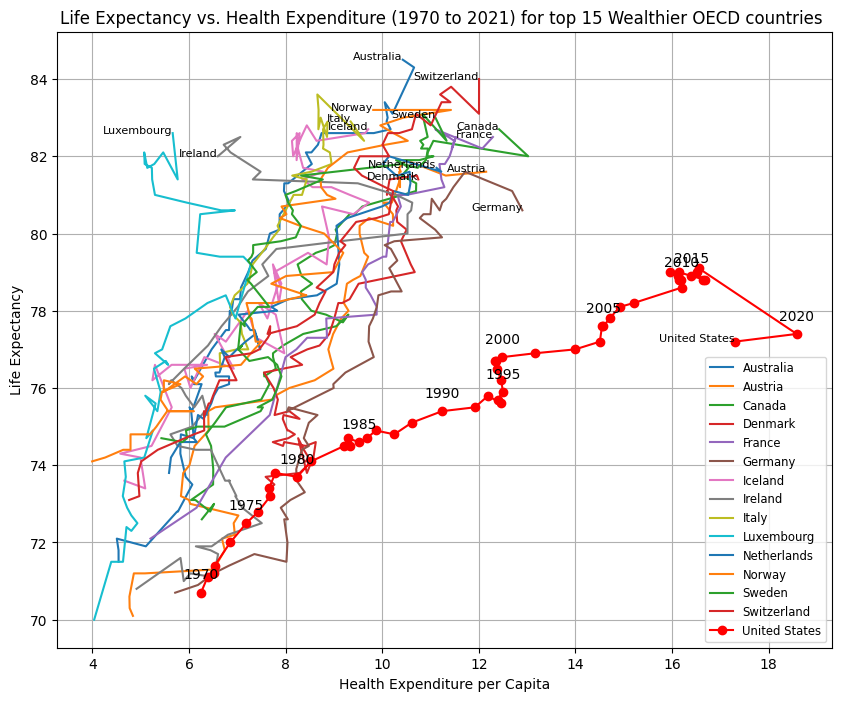

In [10]:
# Initialize the plot
plt.figure(figsize=(10, 8))

# List of countries to highlight (you can modify this as needed)
highlight_countries = ['United States']

# Combine the list of countries to display
#countries_to_display = set(top_10_countries + bottom_10_countries + highlight_countries)
countries_to_display = set(top_10_countries + highlight_countries)

# Filter the DataFrame to include only the countries to display
filtered_df = final_df[final_df['Country'].isin(countries_to_display)]


# Plot data for each country
for country in filtered_df['Country'].unique():
    country_data = filtered_df[filtered_df['Country'] == country]
    
    
    if country in highlight_countries:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='red', marker='o')
        for i, row in country_data.iterrows():
            # Annotate every 5 years
            if int(row['Year']) % 5 == 0:  # Check if the year is a multiple of 5
                plt.annotate(row['Year'], (row['Health Expenditure'], row['Life Expectancy']), textcoords="offset points", xytext=(0,10), ha='center')
    elif country in top_10_countries:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country)
    #elif country in bottom_10_countries:
    #    plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country)
    
    # Annotate the last point with the country name
    last_row = country_data.iloc[-1]
    plt.text(last_row['Health Expenditure'], last_row['Life Expectancy'], country, fontsize=8, ha='right')

# Set labels and title
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Life Expectancy')
plt.grid()
plt.title('Life Expectancy vs. Health Expenditure (1970 to 2021) for top 15 Wealthier OECD countries ')

plt.legend(loc='best', fontsize='small')

# Save the figure 
plt.savefig("../output/graphs/Fig7.png")


# Show the plot
plt.show()

The correlation between Health Expenditure per Capita and Life Expectancy is 0.55
The r-squared value is: 0.30501019998530066


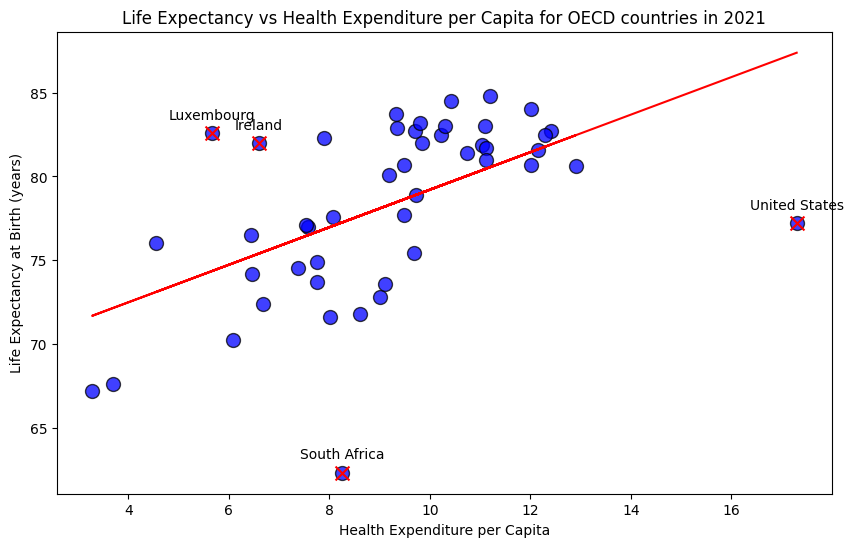

In [11]:
# Get the data just for the year 2021 to show how life expectancy compares between wealthy and poor countries
data2021_df = final_df[final_df['Year'] == 2021]

# Calculate the correlation coefficient and a linear regression model 
# for GDP Per Capita and Life Expectancy for the year 2021
x_values = data2021_df['Health Expenditure']
y_values = data2021_df['Life Expectancy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate residuals
residuals = y_values - regress_values

# Define a threshold for outliers (e.g., 1.5 times the standard deviation of residuals)
threshold = 1.5 * residuals.std()
outliers = data2021_df[abs(residuals) > threshold]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black', s=100, alpha=0.75)
plt.plot(x_values,regress_values,"r-")

# Highlight outliers
plt.scatter(outliers['Health Expenditure'], outliers['Life Expectancy'], marker='x', color='red', s=100, label='Outliers')

# Annotate the outliers
for idx, row in outliers.iterrows():
    plt.annotate(row['Country'], (row['Health Expenditure'], row['Life Expectancy']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Life Expectancy vs Health Expenditure per Capita for OECD countries in 2021')
plt.annotate(line_eq,(30000,65),fontsize=15,color="red")
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Life Expectancy at Birth (years)')
print(f'The correlation between Health Expenditure per Capita and Life Expectancy is {round(rvalue, 2)}')
print(f"The r-squared value is: {rvalue**2}")

# Save the figure
plt.savefig("../output/graphs/Fig8.png")

#Show the plot
plt.show()

In [18]:
# Sorting and selecting top 15 and bottom 15 countries by GDP per capita
top_15_gdp = data2021_df.nlargest(15, 'GDP per Capita')
bottom_15_gdp = data2021_df.nsmallest(15, 'GDP per Capita')

# Combining the top 15 and bottom 15 into a single DataFrame
gdp_df = pd.concat([top_15_gdp, bottom_15_gdp])
gdp_df

,Country,Year,Life Expectancy,Population,GDP per Capita,Health Expenditure
1206,Norway,2021,83.2,5403,86335.0,9.814
1606,Switzerland,2021,84.0,8691,62595.0,12.005
1779,United States,2021,77.2,336998,57523.0,17.299
806,Ireland,2021,82.0,4987,57278.0,6.596
1029,Luxembourg,2021,82.6,639,55347.0,5.661
72,Australia,2021,84.5,25921,50705.0,10.425
431,Denmark,2021,81.4,5854,49259.0,10.747
1102,Netherlands,2021,81.7,17502,48002.0,11.125
1554,Sweden,2021,83.0,10467,46227.0,11.102
593,Germany,2021,80.6,83409,46159.0,12.902


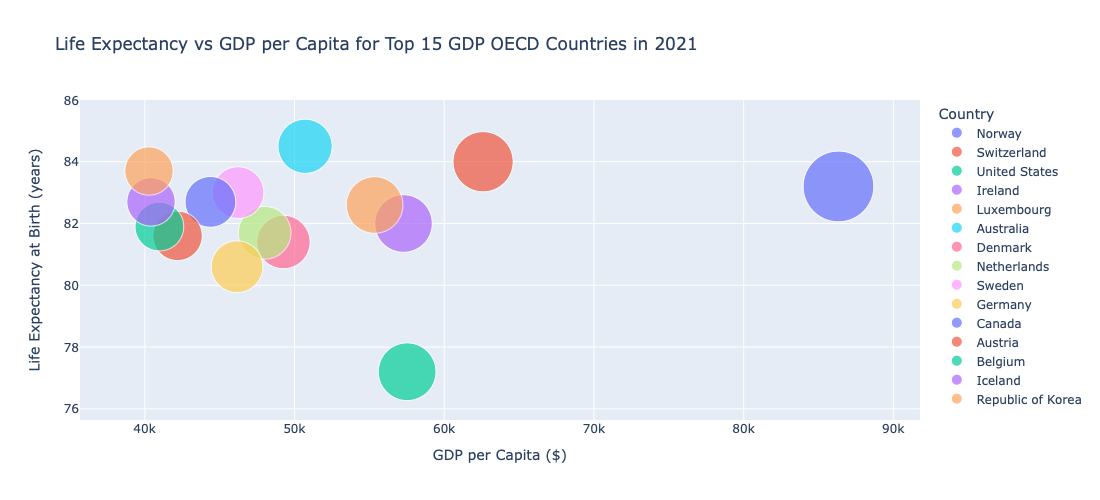

In [19]:
# Create the scatter plot for year 2021 to show how life expectancy looks for top 15 wealthier countries

fig = px.scatter(
    top_15_gdp,
    x='GDP per Capita',
    y='Life Expectancy',
    color='Country',
    #size='Population',
    size='GDP per Capita',
    hover_name='Country',
    #title='Life Expectancy vs GDP per Capita for Top 10 and Bottom 10 GDP OECD Countries in 2021',
    title='Life Expectancy vs GDP per Capita for Top 15 GDP OECD Countries in 2021',    
    labels={'GDP per Capita': 'GDP per Capita ($)', 'Life Expectancy': 'Life Expectancy at Birth (years)'},
    size_max=50
)
# Update the layout to set the size
fig.update_layout(
    width=1000,  # Set the width to 1000 pixels
    height=500   # Set the height to 500 pixels
)

# Save the figure as an HTML file
fig.write_html("../output/graphs/Fig10.html")

# Show the plot
fig.show()